### INITIAL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import time
import os
import fnmatch
import xlsxwriter
import random

import geopandas as gpd
import matplotlib.colors
import glob
import sys


#### DISPLAY STYLE

In [54]:
plt.style.use('tableau-colorblind10')
plt.rcParams['axes.grid'] = False
plt.rcParams['ytick.left'] = 'True'
plt.rcParams['xtick.bottom'] = 'True'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.labelleft'] = 'True'
plt.rcParams['xtick.labelbottom'] = 'True'
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'MS Gothic'

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
linestyle_t = ('solid', 'dashed', 'dashdot', 'dotted')

# df
pd.set_option('display.max_colwidth', None)
# pd.reset_option('display.max_colwidth')


In [3]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

#### FUNCTIONS

In [6]:
# df.plot
def pdplot(df, xlab='xlabel', ylab='ylabel', xlim=(None, None), ylim=(None, None), legend=True, save=(0, None)):
    df.plot(grid=True, figsize=(9, 6))
    # xlab #
    plt.xlabel(xlab)
    # ylab #
    plt.ylabel(ylab)
    # xlim #
    if xlim == (None, None):
        plt.xlim(df.index[0], df.index[-1])
    else:
        plt.xlim(xlim[0], xlim[1])
    # ylim #
    if ylim == (None, None):
        pass
    else:
        plt.ylim(ylim[0], ylim[1])
    # legend #
    if legend:
        plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
    # save #
    if save[0]:
        plt.savefig(save[1].split(".")[0] + "_raw.png")


# pyplot
def mypyplot(df, color=0, linestyle=0, xlab='xlabel', ylab='ylabel', xlim=(None, None), ylim=(None, None), legend=True, save=(False, None)):

    # color #
    n = len(df.columns)  # #variable n below should be number of curves to plot
    if color == 0:  # Mode0: Default
        plt.figure(figsize=(9, 6))
        for i in range(n):
            if linestyle == 1:  # Mode1: randoized  # https://www.geeksforgeeks.org/randomly-select-n-elements-from-list-in-python/
                get_index = random.randrange(len(linestyle_t))
                plt.plot(df.index, df.iloc[:, i], label=df.columns[i], linestyle=linestyle_t[get_index])
            else:
                plt.plot(df.index, df.iloc[:, i], label=df.columns[i])                
    elif color == 1:  # Mode1: 'jet_r' (colors equally divided)  # https://stackoverflow.com/questions/28465028/pyplot-matplotlib-line-plot-same-color
        cmap = plt.get_cmap('jet_r')
        plt.figure(figsize=(9, 6))
        for i in range(n):
            color=cmap(float(i)/n)
            if linestyle == 1:  # Mode1: randoized
                get_index = random.randrange(len(linestyle_t))
                plt.plot(df.index, df.iloc[:, i], label=df.columns[i], c=color, linestyle=linestyle_t[get_index])
            else:
                plt.plot(df.index, df.iloc[:, i], label=df.columns[i], c=color)
    # xlab #
    plt.xlabel(xlab)
    # ylab #
    plt.ylabel(ylab)
    # xlim #
    if xlim == (None, None):
        plt.xlim(df.index[0], df.index[-1])
    else:
        plt.xlim(xlim[0], xlim[1])
    # ylim #
    if ylim == (None, None):
        pass
    else:
        plt.ylim(ylim[0], ylim[1])
    # legend #
    if legend:
        plt.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
    # save #
    if save[0]:
        plt.savefig(save[1])


# https://note.com/shimakaze_soft/n/n725edcf789cf
def wareki2western(year):
    """和暦の年を西暦の年月日に変換する."""
    # print('START >> wareki2western')
    try:
        if type(year) == str:
            if '令和' in year:
                if '元年' in year:
                    year_int = 0
                else:
                    year_int = int(year.split('令和')[1].split('年')[0]) - 1
                year_west = (2019 + year_int)
            elif '平成' in year:
                if '元年' in year:
                    year_int = 0
                else:
                    year_int = int(year.split('平成')[1].split('年')[0]) - 1
                year_west = (1989 + year_int)
            elif '昭和' in year:
                if '元年' in year:
                    year_int = 0
                else:
                    year_int = int(year.split('昭和')[1].split('年')[0]) - 1
                year_west = (1926 + year_int)
            else:
                print('year is none of "令和" , "平成" and "昭和"', year)
                year_west = np.nan

            return year_west
        
        else:
            # print('type(year) is not str:', year)
            pass

        # print('DONE >> wareki2western')
    except ValueError as e:
        raise e

    
# Replace unwanted character from a string object. Then convert it to int.
def str2int(s):
    if type(s) == str:
        if '㎡以上' in s:
            s = s.replace('㎡以上', '')
            print('㎡以上:', s)
        else:
            pass
        return int(s)
    else:
        print('type(l) is not str:', s)
        pass

    
# # Filter series object
# def myfilter(x):
#     if '大阪市' in x:
#         x = 
    


#色定義
def colors_scale(arr):
    n_min = min(arr)
    n_max = max(arr)
    cmap = plt.cm.rainbow
    norm = matplotlib.colors.Normalize(vmin=n_min, vmax=n_max)
    arr = [cmap(norm(r)) for r in arr]
    return arr, cmap, norm


# Debugger
def dbg_print(f):
    def wrapper():
        print('START >>', f.__name__)
        f()
        print('DONE >>', f.__name__)

### 地価公示

RESOURCES:  
https://www.mlit.go.jp/totikensangyo/totikensangyo_fr4_000043.html  
https://www.land.mlit.go.jp/webland/servlet/MainServlet

2023.04.16 v000  
p: price  
f: fluctuation  
s: 商業  
j: 住宅  
c: concatenate

In [2]:
##### SETTINGS #####
filedir = r"C:\Users\A\Downloads"
filedir_exp = filedir

city = ['大阪市', '横浜市', '渋谷区', '新宿区']
column_names = []
for i in range(len(city)):
    column_names.append('商業 ' + city[i])
for i in range(len(city)):
    column_names.append('住宅 ' + city[i])

# File
filename = '001595567.xls'
datapath = filedir + '\\' + filename


In [3]:
##### 価格推移表 #####
##### DATA PROCESSING #####
df_p = pd.read_excel(datapath, sheet_name=2, index_col=[2, 1])  # sheet 2
df_p = df_p.drop(df_p.index[[0]], axis=0)  # Drop 1st index
df_p = df_p.drop(df_p.columns[[0]], axis=1)  # Drop 1st column
df_p = df_p.T
df_p = df_p / 1_000_000  # million
df_p_s = df_p['商業']

df_p_c = pd.concat([df_p['商業'][city], df_p['住宅'][city]], axis=1)
df_p_c.columns = column_names  # change column names
new_index = pd.Series(df_p_c.index).apply(wareki2western)  # apply the function to the DataFrame index
df_p_c.index = new_index  # assign the new index to the DataFrame


In [4]:
df_p_c.head(3)

,商業 大阪市,商業 横浜市,商業 渋谷区,商業 新宿区,住宅 大阪市,住宅 横浜市,住宅 渋谷区,住宅 新宿区
1975,0.4661,0.3063,0.66,1.2271,0.0976,0.0611,0.1944,0.1946
1976,0.4676,0.3128,0.6686,1.2181,0.0978,0.0614,0.1957,0.1952
1977,0.4753,0.3152,0.653,1.1446,0.0992,0.0623,0.2007,0.198


#### 価格

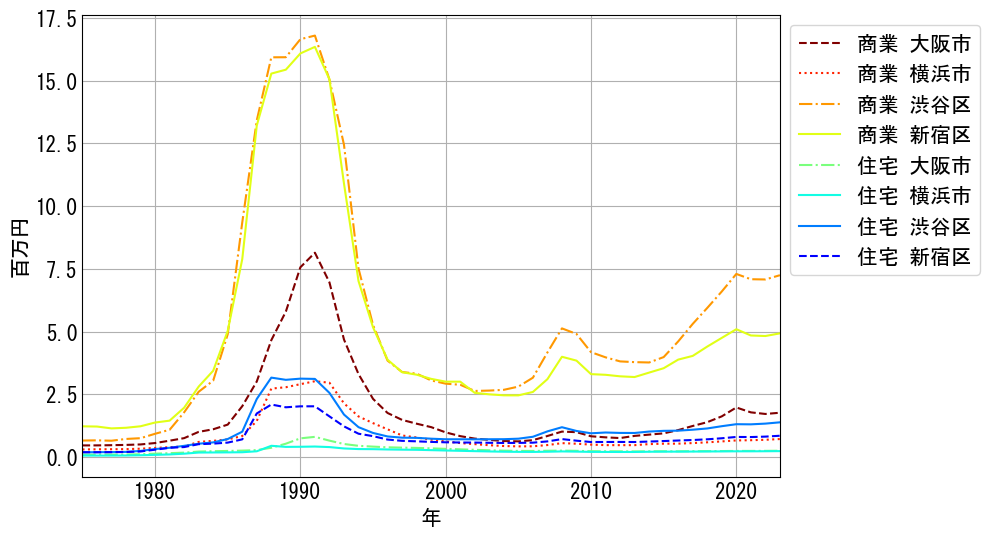

In [61]:
mypyplot(df_p_c, color=1, linestyle=1, xlab='年', ylab='百万円')

In [20]:
##### 変動率推移表 #####
##### DATA PROCESSING #####
df_f = pd.read_excel(datapath, sheet_name=1, index_col=[2,1])  # sheet 1
df_f = df_f.drop(df_f.index[[0]], axis=0)  # Drop 1st index
df_f = df_f.drop(df_f.columns[[0]], axis=1)  # Drop 1st column
df_f = df_f.T

In [21]:
df_f_c = pd.concat([df_f['商業'][city], df_f['住宅'][city]], axis=1)
df_f_c.columns = column_names  # change column names
new_index = pd.Series(df_f_c.index).apply(wareki2western)  # apply the function to the DataFrame index
df_f_c.index = new_index  # assign the new index to the DataFrame
df_f_c.iloc[0, :] = 1  # normalize to the oldest data
df_f_c_s = df_f_c.cumsum()  # cumlative sum

In [22]:
df_f_c_s.head(3)

,商業 大阪市,商業 横浜市,商業 渋谷区,商業 新宿区,住宅 大阪市,住宅 横浜市,住宅 渋谷区,住宅 新宿区
1975,1,1,1,1,1,1,1,1
1976,1.1,1.2,1.5,-0.6,1.2,1.3,1.6,1.3
1977,2.5,1.5,3.5,0.4,2.7,2.5,3.6,3.4


#### 変動率

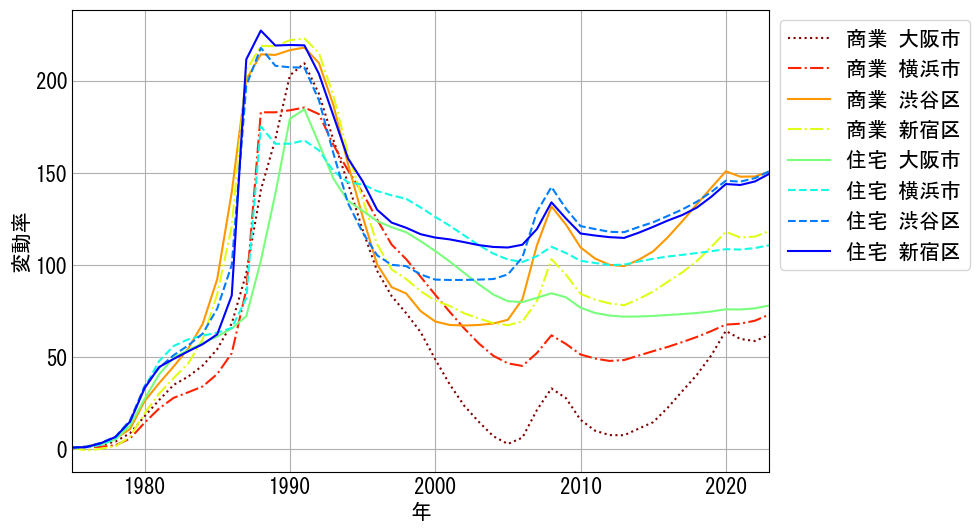

In [62]:
mypyplot(df_f_c_s, color=1, linestyle=1, xlab='年', ylab='変動率')

### 不動産取引価格

REFERENCES:  



In [162]:
##### SETTINGS #####

# RealState data
filedir = r"C:\Users\A\Downloads\27_Osaka Prefecture_20224_20224"
filedir_exp = filedir
filename = '27_Osaka Prefecture_20224_20224.csv'
datapath = filedir + '\\' + filename

# 市区町村のshapeデータ
geofile = r"C:\Users\A\Downloads\N03-20220101_27_GML\N03-22_27_220101.geojson"
gdf = gpd.read_file(geofile, encoding='SHIFT-JIS')
gdf = gdf[gdf['N03_003'] == '大阪市']
gdf = gdf.reset_index(drop=True)  # drop: drops current index
# 市区町村の重心を取得
gdf['centroid'] = gdf['geometry'].centroid
gdf["x"] = gdf.centroid.x
gdf["y"] = gdf.centroid.y

C:\Users\A\AppData\Local\Temp\ipykernel_27336\397525516.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid
C:\Users\A\AppData\Local\Temp\ipykernel_27336\397525516.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["x"] = gdf.centroid.x
C:\Users\A\AppData\Local\Temp\ipykernel_27336\397525516.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["y"] = gdf.centroid.y


In [160]:
##### DATA PROCESSING #####

# RealState data
df = pd.read_csv(datapath, encoding="cp932")  # sheet 2
# df = df_p.drop(df_p.columns[[0]], axis=1)  # Drop 1st column

# mask data
# 大阪市.*区
mask = df[['市区町村名']].apply(lambda x: x.str.contains('大阪市.*区', regex=True)).any(axis=1)  # https://stackoverflow.com/questions/32614357/search-and-filter-pandas-dataframe-with-regular-expressions
df = df[mask]
# df['面積（㎡）'] < 80
df['面積（㎡）'] = df['面積（㎡）'].apply(str2int)  # str2int
df = df.loc[df['面積（㎡）'] < 80]
# data clensing
df['建築年'] = df['建築年'].apply(wareki2western)  # wareki2western
# count
df_p = df.groupby('市区町村名').count()
# sorting
order = df_p['No'].sort_values(ascending=False).index
df['市区町村名'] = pd.Categorical(df['市区町村名'], categories=order, ordered=True)
df.sort_values(by='市区町村名', inplace=True)
df = df.reset_index(drop=True)  # drop: drops current index

㎡以上: 2000
year is none of "令和" , "平成" and "昭和" 戦前
year is none of "令和" , "平成" and "昭和" 戦前
year is none of "令和" , "平成" and "昭和" 戦前


In [161]:
df

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1074,中古マンション等,NaN,27128,大阪府,大阪市中央区,龍造寺町,谷町六丁目,5,45000000,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2022年第４四半期,改装済,NaN
1,974,中古マンション等,NaN,27128,大阪府,大阪市中央区,北浜,北浜(大阪),0,92000000,...,住宅,NaN,NaN,NaN,商業地域,80.0,800.0,2022年第４四半期,未改装,NaN
2,975,中古マンション等,NaN,27128,大阪府,大阪市中央区,北浜,北浜(大阪),0,86000000,...,住宅,NaN,NaN,NaN,商業地域,80.0,800.0,2022年第４四半期,未改装,NaN
3,976,中古マンション等,NaN,27128,大阪府,大阪市中央区,北浜,北浜(大阪),0,57000000,...,住宅,NaN,NaN,NaN,商業地域,80.0,800.0,2022年第４四半期,未改装,NaN
4,977,中古マンション等,NaN,27128,大阪府,大阪市中央区,北浜,淀屋橋,1,8000000,...,事務所,NaN,NaN,NaN,商業地域,80.0,800.0,2022年第４四半期,未改装,調停・競売等
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,791,宅地(土地),住宅地,27124,大阪府,大阪市鶴見区,横堤,横堤,6,11000000,...,住宅,北,道路,4.0,第１種住居地域,80.0,200.0,2022年第４四半期,NaN,NaN
825,789,中古マンション等,NaN,27124,大阪府,大阪市鶴見区,諸口,横堤,6,18000000,...,NaN,NaN,NaN,NaN,準住居地域,80.0,300.0,2022年第４四半期,NaN,調停・競売等
826,785,宅地(土地と建物),住宅地,27124,大阪府,大阪市鶴見区,茨田大宮,門真南,13,38000000,...,住宅,南西,道路,6.0,第２種中高層住居専用地域,60.0,200.0,2022年第４四半期,NaN,NaN
827,774,宅地(土地と建物),住宅地,27124,大阪府,大阪市鶴見区,今津南,徳庵,12,200000,...,住宅,南,私道,NaN,第１種住居地域,80.0,200.0,2022年第４四半期,NaN,隣地の購入、私道を含む取引


In [130]:
df.describe()

,No,市区町村コード,取引価格（総額）,坪単価,面積（㎡）,取引価格（㎡単価）,建築年,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）
count,829.000000,829.000000,8.290000e+02,4.000000e+01,829.000000,4.000000e+01,754.000000,192.000000,829.000000,829.000000
mean,540.068758,27116.932449,2.245384e+07,1.070150e+06,44.439083,3.234250e+05,1999.787798,6.189063,76.043426,397.828709
std,319.716419,8.759827,1.771172e+07,1.069005e+06,19.731414,3.197730e+05,16.518654,4.580477,7.972055,186.876473
min,2.000000,27102.000000,2.000000e+05,4.600000e+04,15.000000,1.400000e+04,1947.000000,1.700000,60.000000,200.000000
25%,256.000000,27108.000000,1.400000e+07,6.175000e+05,25.000000,1.850000e+05,1986.000000,4.000000,80.000000,300.000000
50%,535.000000,27118.000000,1.800000e+07,8.650000e+05,50.000000,2.600000e+05,2004.000000,5.000000,80.000000,400.000000
75%,827.000000,27125.000000,2.700000e+07,1.100000e+06,60.000000,3.325000e+05,2014.000000,6.525000,80.000000,600.000000
max,1074.000000,27128.000000,2.000000e+08,6.300000e+06,75.000000,1.900000e+06,2023.000000,27.000000,80.000000,1000.000000


In [163]:
gdf

N03_001  N03_002 N03_003 N03_004 N03_007  \
0      大阪府      NaN     大阪市     都島区   27102   
1      大阪府      NaN     大阪市     福島区   27103   
2      大阪府      NaN     大阪市     此花区   27104   
3      大阪府      NaN     大阪市     此花区   27104   
4      大阪府      NaN     大阪市     此花区   27104   
5      大阪府      NaN     大阪市     此花区   27104   
6      大阪府      NaN     大阪市     此花区   27104   
7      大阪府      NaN     大阪市     此花区   27104   
8      大阪府      NaN     大阪市     此花区   27104   
9      大阪府      NaN     大阪市     此花区   27104   
10     大阪府      NaN     大阪市     此花区   27104   
11     大阪府      NaN     大阪市      西区   27106   
12     大阪府      NaN     大阪市      港区   27107   
13     大阪府      NaN     大阪市      港区   27107   
14     大阪府      NaN     大阪市      港区   27107   
15     大阪府      NaN     大阪市     大正区   27108   
16     大阪府      NaN     大阪市     大正区   27108   
17     大阪府      NaN     大阪市    天王寺区   27109   
18     大阪府      NaN     大阪市     浪速区   27111   
19     大阪府      NaN     大阪市    西淀川区   27113   
20     大阪府      NaN     大阪市    東淀川区   27114   
21     大阪府      NaN     大阪市     東成区   27115   
22     大阪府      NaN     大阪市     生野区   27116   
23     大阪府      NaN     大阪市      旭区   27117   
24     大阪府      NaN     大阪市     城東区   27118   
25     大阪府      NaN     大阪市    阿倍野区   27119   
26     大阪府      NaN     大阪市     住吉区   27120   
27     大阪府      NaN     大阪市    東住吉区   27121   
28     大阪府      NaN     大阪市     西成区   27122   
29     大阪府      NaN     大阪市     淀川区   27123   
30     大阪府      NaN     大阪市     鶴見区   27124   
31     大阪府      NaN     大阪市    住之江区   27125   
32     大阪府      NaN     大阪市    住之江区   27125   
33     大阪府      NaN     大阪市    住之江区   27125   
34     大阪府      NaN     大阪市    住之江区   27125   
35     大阪府      NaN     大阪市    住之江区   27125   
36     大阪府      NaN     大阪市     平野区   27126   
37     大阪府      NaN     大阪市      北区   27127   
38     大阪府      NaN     大阪市     中央区   27128   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

#### geopandas

In [164]:
# Make data for colormap
# Create gdf['count'] RealEstate data
arr = []
for i in range(len(gdf)):
    print("gdf['N03_003'][" + str(i) + ']:', gdf['N03_003'][i], ',', "gdf['N03_004'][" + str(i) + ']:', gdf['N03_004'][i])
    
    if gdf['N03_003'].isna()[i] and gdf['N03_004'].isna()[i]:
        print("gdf['N03_003'].isna()["+str(i)+"] == True and gdf['N03_004'].isna()["+str(i)+"] == True")
        arr.append(0)
    elif gdf['N03_003'].isna()[i]:
        print("gdf['N03_003'].isna()["+str(i)+"] == True")
        arr.append(df_p.loc[gdf['N03_004'][i]]['No'])
    elif gdf['N03_004'].isna()[i]:
        print("gdf['N03_004'].isna()["+str(i)+"] == True")
    else:
        arr.append(df_p.loc[gdf['N03_003'][i] + gdf['N03_004'][i]]['No'])
# Create a new column
gdf['count'] = arr
# 色を描画
num_color, cmap, norm = colors_scale(gdf['count'])

gdf['N03_003'][0]: 大阪市 , gdf['N03_004'][0]: 都島区
gdf['N03_003'][1]: 大阪市 , gdf['N03_004'][1]: 福島区
gdf['N03_003'][2]: 大阪市 , gdf['N03_004'][2]: 此花区
gdf['N03_003'][3]: 大阪市 , gdf['N03_004'][3]: 此花区
gdf['N03_003'][4]: 大阪市 , gdf['N03_004'][4]: 此花区
gdf['N03_003'][5]: 大阪市 , gdf['N03_004'][5]: 此花区
gdf['N03_003'][6]: 大阪市 , gdf['N03_004'][6]: 此花区
gdf['N03_003'][7]: 大阪市 , gdf['N03_004'][7]: 此花区
gdf['N03_003'][8]: 大阪市 , gdf['N03_004'][8]: 此花区
gdf['N03_003'][9]: 大阪市 , gdf['N03_004'][9]: 此花区
gdf['N03_003'][10]: 大阪市 , gdf['N03_004'][10]: 此花区
gdf['N03_003'][11]: 大阪市 , gdf['N03_004'][11]: 西区
gdf['N03_003'][12]: 大阪市 , gdf['N03_004'][12]: 港区
gdf['N03_003'][13]: 大阪市 , gdf['N03_004'][13]: 港区
gdf['N03_003'][14]: 大阪市 , gdf['N03_004'][14]: 港区
gdf['N03_003'][15]: 大阪市 , gdf['N03_004'][15]: 大正区
gdf['N03_003'][16]: 大阪市 , gdf['N03_004'][16]: 大正区
gdf['N03_003'][17]: 大阪市 , gdf['N03_004'][17]: 天王寺区
gdf['N03_003'][18]: 大阪市 , gdf['N03_004'][18]: 浪速区
gdf['N03_003'][19]: 大阪市 , gdf['N03_004'][19]: 西淀川区
gdf['N03_003'][20]: 大阪

C:\Users\A\AppData\Local\Temp\ipykernel_27336\1018667993.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  name_df = gdf.groupby(['N03_003', 'N03_004'], dropna=False, as_index=False).mean().loc[:, ['N03_003', 'N03_004', 'x', 'y']]


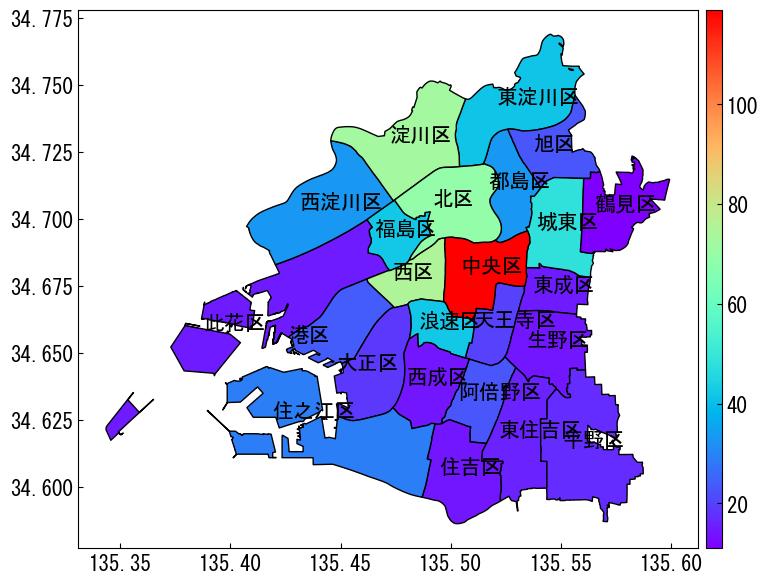

In [165]:
##### PLOT #####
fig, ax = plt.subplots(1, 1, figsize=(8, 8))


# gdf.plot
base = gdf.plot(ax=ax, color=num_color, edgecolor='black')  # 

# 市町村名をプロット
# Extract cordinates
name_df = gdf.groupby(['N03_003', 'N03_004'], dropna=False, as_index=False).mean().loc[:, ['N03_003', 'N03_004', 'x', 'y']]
name_df.drop(name_df[name_df['N03_004'].isna()].index)  # drop NaN
# Loop for the length of name_df
mylist = list(name_df.index)
for l in mylist:
    plt.text(name_df['x'][l]-0.01, name_df['y'][l], name_df['N03_004'][l], fontname="MS Gothic", fontsize=15)

# colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cax = fig.add_axes([base.get_position().x1+0.01, base.get_position().y0, 0.02, base.get_position().height])
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params()


#### Scatter plot

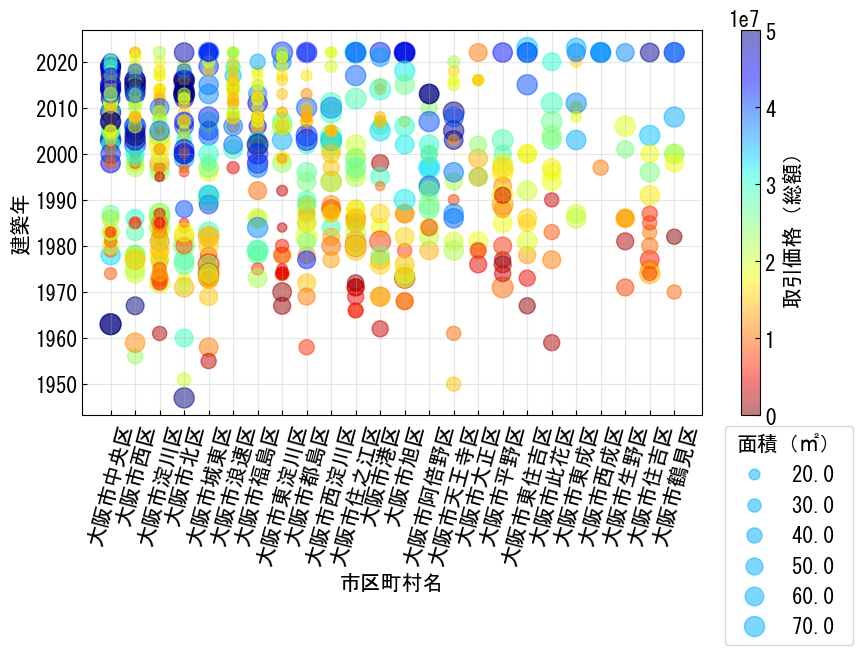

In [166]:
fig, ax = plt.subplots(figsize=(10, 5))
# settings
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.grid(True, alpha=.3)
plt.xticks(rotation=75)

# scatter plot
x=df['市区町村名']
y=df['建築年']
c=df['取引価格（総額）']
s=df['面積（㎡）'] * 3
scatter = ax.scatter(x=x, y=y, c=c, s=s, cmap='jet_r', vmin=0, vmax=50_000_000, alpha=.5)

# plot size
kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="{x} ", func=lambda s: s/3)  # https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
ax.legend(*scatter.legend_elements(**kw), bbox_to_anchor=(1.02, 0), loc="upper left", title=s.name)
# colorbar
plt.colorbar(scatter, label=c.name)

#### Bar chart